In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/asteroid-dataset/dataset.csv


In [2]:
df=pd.read_csv('/kaggle/input/asteroid-dataset/dataset.csv',low_memory=False)

In [3]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [4]:
df.isnull().sum()

id                     0
spkid                  0
full_name              0
pdes                   0
name              936460
prefix            958506
neo                    4
pha                19921
H                   6263
diameter          822315
albedo            823421
diameter_sigma    822443
orbit_id               0
epoch                  0
epoch_mjd              0
epoch_cal              0
equinox                0
e                      0
a                      0
q                      0
i                      0
om                     0
w                      0
ma                     1
ad                     4
n                      0
tp                     0
tp_cal                 0
per                    4
per_y                  1
moid               19921
moid_ld              127
sigma_e            19922
sigma_a            19922
sigma_q            19922
sigma_i            19922
sigma_om           19922
sigma_w            19922
sigma_ma           19922
sigma_ad           19926


In [5]:
#dropping features with too many missing value and id, spkid and full_name
df.drop(['name','prefix','diameter','albedo','diameter_sigma','id','spkid','full_name'],axis=1,inplace=True)

In [6]:
#basic statistical description of features
df.describe()

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,...,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
count,952261.000000,9.585240e+05,958524.000000,9.585240e+05,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,958524.000000,...,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.386020e+05,9.385980e+05,9.386020e+05,9.386020e+05,9.385980e+05,958522.000000
mean,16.906411,2.458869e+06,58868.781950,2.019693e+07,0.156116,2.902143,2.394887,9.054901,168.456416,181.369457,...,1.982929e+01,1.168449e+00,5.310234e+00,1.370062e+06,1.369977e+06,2.131453e+01,5.060221e-02,4.312780e+08,8.525815e+04,0.561153
std,1.790405,7.016716e+02,701.671573,1.930354e+04,0.092643,39.719503,2.139246,6.637656,102.881707,103.887995,...,2.903785e+03,1.282231e+02,1.333381e+03,9.158996e+08,9.158991e+08,7.197034e+03,9.814953e+00,2.953046e+11,2.767681e+07,2.745700
min,-1.100000,2.425052e+06,25051.000000,1.927062e+07,0.000000,-14702.447872,0.070511,0.007744,0.000025,0.000130,...,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,0.000000
25%,16.100000,2.459000e+06,59000.000000,2.020053e+07,0.092193,2.387835,1.971401,4.165419,80.604399,91.482063,...,1.462000e-07,6.095900e-06,3.619400e-05,5.755000e-05,2.573700e-05,2.340900e-08,2.768800e-09,1.110900e-04,1.794500e-05,0.518040
50%,16.900000,2.459000e+06,59000.000000,2.020053e+07,0.145002,2.646969,2.225816,7.415665,159.826919,182.358081,...,2.271900e-07,8.688800e-06,6.642550e-05,1.047100e-04,4.900100e-05,4.359000e-08,4.638000e-09,2.230800e-04,3.501700e-05,0.566280
75%,17.714000,2.459000e+06,59000.000000,2.020053e+07,0.200650,3.001932,2.578315,12.407550,252.247751,271.521589,...,6.583200e-07,1.591500e-05,1.609775e-04,3.114400e-04,1.718900e-04,1.196600e-07,1.124000e-08,8.139600e-04,9.775475e-05,0.613927
max,33.200000,2.459000e+06,59000.000000,2.020053e+07,1.855356,33488.895955,80.398819,175.082901,359.999793,359.999646,...,1.015000e+06,5.533000e+04,1.199100e+06,8.845100e+11,8.845100e+11,5.509700e+06,7.698800e+03,2.853100e+14,1.910700e+10,2686.600000


In [7]:
#correlations between features
corr=df.corr()
corr.style.background_gradient(cmap='PuBu')

,H,epoch,epoch_mjd,epoch_cal,e,a,q,i,om,w,ma,ad,n,tp,tp_cal,per,per_y,moid,moid_ld,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,rms
H,1.000000,-0.175712,-0.175712,-0.176349,0.345334,-0.032187,-0.437429,-0.099022,0.000883,-0.003403,-0.033698,-0.024343,0.588960,-0.061751,-0.062157,-0.004489,-0.004488,-0.433082,-0.435188,-0.028187,-0.016114,-0.033502,-0.029511,-0.004491,-0.006980,-0.006979,-0.013451,0.000111,-0.006806,-0.013075,0.005633
epoch,-0.175712,1.000000,1.000000,0.999599,-0.098374,-0.004905,-0.063816,-0.055594,-0.005031,-0.001411,0.001865,-0.003572,-0.053633,0.449714,0.449241,-0.000403,-0.000403,-0.065805,-0.063666,-0.064730,-0.032632,-0.062836,-0.068951,-0.025013,-0.013782,-0.013782,-0.027830,-0.029254,-0.013436,-0.024551,0.007472
epoch_mjd,-0.175712,1.000000,1.000000,0.999599,-0.098374,-0.004905,-0.063816,-0.055594,-0.005031,-0.001411,0.001865,-0.003572,-0.053633,0.449714,0.449241,-0.000403,-0.000403,-0.065805,-0.063666,-0.064730,-0.032632,-0.062836,-0.068951,-0.025013,-0.013782,-0.013782,-0.027830,-0.029254,-0.013436,-0.024551,0.007472
epoch_cal,-0.176349,0.999599,0.999599,1.000000,-0.099691,-0.004919,-0.063578,-0.054927,-0.004362,-0.001509,0.002175,-0.003743,-0.054068,0.449400,0.448965,-0.000597,-0.000597,-0.065551,-0.063620,-0.064685,-0.032453,-0.062907,-0.068721,-0.025095,-0.013816,-0.013815,-0.027630,-0.029088,-0.013470,-0.024424,0.007447
e,0.345334,-0.098374,-0.098374,-0.099691,1.000000,0.014725,-0.119463,0.128171,0.003173,0.008671,-0.025742,0.025767,0.196245,-0.053752,-0.054236,0.012076,0.012073,-0.109200,-0.107766,-0.002338,0.008557,-0.006216,-0.000732,-0.000202,-0.002510,-0.002510,0.009128,0.000493,-0.002450,0.013446,-0.004903
a,-0.032187,-0.004905,-0.004905,-0.004919,0.014725,1.000000,0.074253,0.025212,-0.001993,-0.001237,0.001673,0.999559,-0.025440,-0.006831,-0.006806,0.981575,0.888619,0.074200,0.073954,0.006161,0.028606,0.007018,0.006132,0.001080,0.001599,0.001599,0.036793,0.000087,0.001564,0.329317,-0.000485
q,-0.437429,-0.063816,-0.063816,-0.063578,-0.119463,0.074253,1.000000,0.035545,-0.011010,-0.002149,-0.002259,0.053731,-0.328325,-0.085415,-0.084993,0.005505,0.005505,0.999733,0.995671,0.098595,0.050998,0.119821,0.096161,0.018575,0.030078,0.030077,0.041902,0.001200,0.029415,0.036312,-0.005382
i,-0.099022,-0.055594,-0.055594,-0.054927,0.128171,0.025212,0.035545,1.000000,-0.016534,-0.003157,0.004419,0.037858,-0.012026,-0.026836,-0.026464,0.026047,0.026040,0.044770,0.043579,-0.000054,0.007937,-0.000582,0.011187,-0.001593,-0.001634,-0.001634,0.008237,0.000255,-0.001613,0.016703,-0.003629
om,0.000883,-0.005031,-0.005031,-0.004362,0.003173,-0.001993,-0.011010,-0.016534,1.000000,-0.138383,-0.000901,-0.001755,0.008162,-0.002639,-0.002700,-0.001423,-0.001423,-0.011180,-0.011058,-0.001088,0.000305,-0.002105,-0.001024,-0.001106,-0.000420,-0.000420,0.000446,0.000788,-0.000411,0.000513,-0.001784
w,-0.003403,-0.001411,-0.001411,-0.001509,0.008671,-0.001237,-0.002149,-0.003157,-0.138383,1.000000,-0.006368,-0.001122,0.002910,0.001063,0.001028,-0.001237,-0.001237,-0.002130,-0.002000,-0.001922,-0.000057,-0.002259,-0.002266,0.000613,-0.000339,-0.000339,0.000041,-0.001792,-0.000325,-0.000557,0.001460


In [8]:
#dropping features that are highly correlated
corr = df.corr().abs()
upper=corr.where(np.triu(np.ones(corr.shape), k=1).astype(np.bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.88)]
df.drop(to_drop, axis=1, inplace=True)

In [9]:
corr=df.corr()
corr.style.background_gradient(cmap='PuBu')

,H,epoch,e,a,q,i,om,w,ma,n,tp,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,rms
H,1.000000,-0.175712,0.345334,-0.032187,-0.437429,-0.099022,0.000883,-0.003403,-0.033698,0.588960,-0.061751,-0.028187,-0.016114,-0.033502,-0.029511,-0.004491,-0.006980,0.000111,0.005633
epoch,-0.175712,1.000000,-0.098374,-0.004905,-0.063816,-0.055594,-0.005031,-0.001411,0.001865,-0.053633,0.449714,-0.064730,-0.032632,-0.062836,-0.068951,-0.025013,-0.013782,-0.029254,0.007472
e,0.345334,-0.098374,1.000000,0.014725,-0.119463,0.128171,0.003173,0.008671,-0.025742,0.196245,-0.053752,-0.002338,0.008557,-0.006216,-0.000732,-0.000202,-0.002510,0.000493,-0.004903
a,-0.032187,-0.004905,0.014725,1.000000,0.074253,0.025212,-0.001993,-0.001237,0.001673,-0.025440,-0.006831,0.006161,0.028606,0.007018,0.006132,0.001080,0.001599,0.000087,-0.000485
q,-0.437429,-0.063816,-0.119463,0.074253,1.000000,0.035545,-0.011010,-0.002149,-0.002259,-0.328325,-0.085415,0.098595,0.050998,0.119821,0.096161,0.018575,0.030078,0.001200,-0.005382
i,-0.099022,-0.055594,0.128171,0.025212,0.035545,1.000000,-0.016534,-0.003157,0.004419,-0.012026,-0.026836,-0.000054,0.007937,-0.000582,0.011187,-0.001593,-0.001634,0.000255,-0.003629
om,0.000883,-0.005031,0.003173,-0.001993,-0.011010,-0.016534,1.000000,-0.138383,-0.000901,0.008162,-0.002639,-0.001088,0.000305,-0.002105,-0.001024,-0.001106,-0.000420,0.000788,-0.001784
w,-0.003403,-0.001411,0.008671,-0.001237,-0.002149,-0.003157,-0.138383,1.000000,-0.006368,0.002910,0.001063,-0.001922,-0.000057,-0.002259,-0.002266,0.000613,-0.000339,-0.001792,0.001460
ma,-0.033698,0.001865,-0.025742,0.001673,-0.002259,0.004419,-0.000901,-0.006368,1.000000,-0.006827,0.170629,-0.000469,-0.002790,-0.000397,-0.001184,0.001245,-0.001764,0.000623,0.001619
n,0.588960,-0.053633,0.196245,-0.025440,-0.328325,-0.012026,0.008162,0.002910,-0.006827,1.000000,-0.016598,-0.017135,-0.010045,-0.019442,-0.016897,-0.003481,-0.004369,0.000480,0.004960


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 25 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   pdes      958524 non-null  object 
 1   neo       958520 non-null  object 
 2   pha       938603 non-null  object 
 3   H         952261 non-null  float64
 4   orbit_id  958524 non-null  object 
 5   epoch     958524 non-null  float64
 6   equinox   958524 non-null  object 
 7   e         958524 non-null  float64
 8   a         958524 non-null  float64
 9   q         958524 non-null  float64
 10  i         958524 non-null  float64
 11  om        958524 non-null  float64
 12  w         958524 non-null  float64
 13  ma        958523 non-null  float64
 14  n         958524 non-null  float64
 15  tp        958524 non-null  float64
 16  sigma_e   938602 non-null  float64
 17  sigma_a   938602 non-null  float64
 18  sigma_q   938602 non-null  float64
 19  sigma_i   938602 non-null  float64
 20  sigm

In [11]:
df[['pdes','neo','pha','orbit_id','equinox','class']]

,pdes,neo,pha,orbit_id,equinox,class
0,1,N,N,JPL 47,J2000,MBA
1,2,N,N,JPL 37,J2000,MBA
2,3,N,N,JPL 112,J2000,MBA
3,4,N,N,JPL 35,J2000,MBA
4,5,N,N,JPL 114,J2000,MBA
...,...,...,...,...,...,...
958519,6013 P-L,N,N,JPL 5,J2000,MBA
958520,6331 P-L,N,N,8,J2000,MBA
958521,6344 P-L,Y,Y,17,J2000,APO
958522,2060 T-2,N,N,JPL 3,J2000,MBA


In [12]:
#we can drop this column
df['equinox'].value_counts()

J2000    958524
Name: equinox, dtype: int64

In [13]:
df['class'].value_counts()

MBA    855954
OMB     28355
IMB     20360
MCA     18685
APO     12687
AMO      8457
TJN      8221
TNO      3468
ATE      1729
CEN       506
AST        76
IEO        22
HYA         4
Name: class, dtype: int64

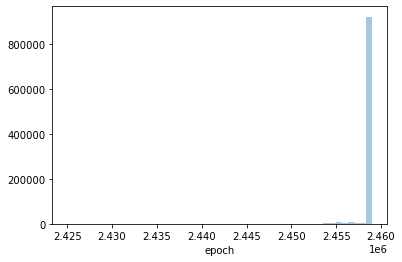

In [14]:
#highly left skewed 
sns.distplot(df['epoch'],kde=False)

In [15]:
#dropping equinox, epoch, orbit_id and pdes
df.drop(['pdes','orbit_id','equinox','epoch'],axis=1,inplace=True)
df.head()

,neo,pha,H,e,a,q,i,om,w,ma,...,tp,sigma_e,sigma_a,sigma_q,sigma_i,sigma_om,sigma_w,sigma_n,class,rms
0,N,N,3.40,0.076009,2.769165,2.558684,10.594067,80.305531,73.597695,77.372098,...,2.458239e+06,4.819000e-12,1.032800e-11,1.956900e-11,4.608900e-09,6.168800e-08,6.624800e-08,1.196500e-12,MBA,0.43301
1,N,N,4.20,0.229972,2.773841,2.135935,34.832932,173.024741,310.202392,144.975675,...,2.458321e+06,3.193400e-08,4.033700e-09,8.832200e-08,3.469400e-06,6.272400e-06,9.128200e-06,4.653600e-10,MBA,0.35936
2,N,N,5.33,0.256936,2.668285,1.982706,12.991043,169.851482,248.066193,125.435355,...,2.458446e+06,3.052000e-08,3.471800e-09,8.139200e-08,3.223100e-06,1.664600e-05,1.772100e-05,4.413400e-10,MBA,0.33848
3,N,N,3.00,0.088721,2.361418,2.151909,7.141771,103.810804,150.728541,95.861938,...,2.458248e+06,2.332100e-10,1.514300e-09,1.928600e-09,2.170600e-07,3.880800e-07,1.789300e-07,2.612500e-10,MBA,0.39980
4,N,N,6.90,0.190913,2.574037,2.082619,5.367427,141.571026,358.648418,17.846343,...,2.458926e+06,2.373700e-08,3.970900e-09,6.092400e-08,2.740800e-06,2.894900e-05,2.984200e-05,5.522700e-10,MBA,0.52191


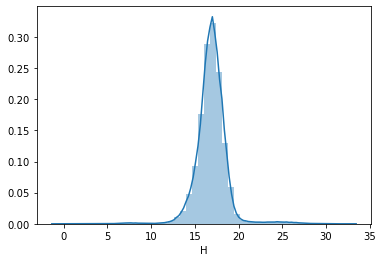

In [16]:
sns.distplot(df['H'])

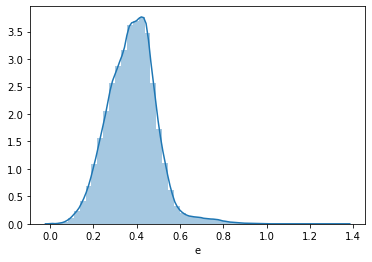

In [17]:
df['e']=df['e'].apply(np.sqrt)
sns.distplot(df['e'])

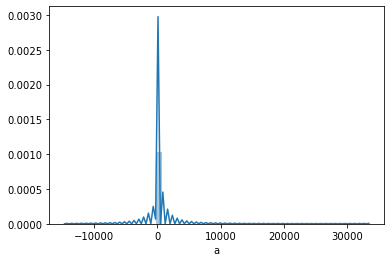

In [18]:
sns.distplot(df['a'])

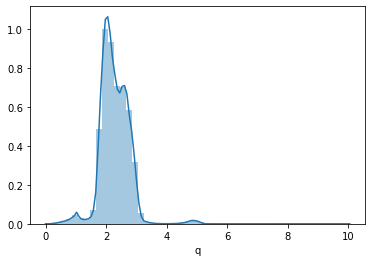

In [19]:
sns.distplot(df[df['q']<10]['q'])

In [20]:
df.isnull().sum()

neo             4
pha         19921
H            6263
e               0
a               0
q               0
i               0
om              0
w               0
ma              1
n               0
tp              0
sigma_e     19922
sigma_a     19922
sigma_q     19922
sigma_i     19922
sigma_om    19922
sigma_w     19922
sigma_n     19922
class           0
rms             2
dtype: int64

In [21]:
#dropping all the null values as we have lots of data
df.dropna(inplace=True)
df.isnull().sum()

neo         0
pha         0
H           0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
n           0
tp          0
sigma_e     0
sigma_a     0
sigma_q     0
sigma_i     0
sigma_om    0
sigma_w     0
sigma_n     0
class       0
rms         0
dtype: int64

In [22]:
#we have too less asteroid that are potential hazard that mean we have a skewed class
df['pha'].value_counts()

N    930269
Y      2066
Name: pha, dtype: int64

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932335 entries, 0 to 958523
Data columns (total 21 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   neo       932335 non-null  object 
 1   pha       932335 non-null  object 
 2   H         932335 non-null  float64
 3   e         932335 non-null  float64
 4   a         932335 non-null  float64
 5   q         932335 non-null  float64
 6   i         932335 non-null  float64
 7   om        932335 non-null  float64
 8   w         932335 non-null  float64
 9   ma        932335 non-null  float64
 10  n         932335 non-null  float64
 11  tp        932335 non-null  float64
 12  sigma_e   932335 non-null  float64
 13  sigma_a   932335 non-null  float64
 14  sigma_q   932335 non-null  float64
 15  sigma_i   932335 non-null  float64
 16  sigma_om  932335 non-null  float64
 17  sigma_w   932335 non-null  float64
 18  sigma_n   932335 non-null  float64
 19  class     932335 non-null  object 
 20  rms 

In [24]:
df['neo'].value_counts()

N    909452
Y     22883
Name: neo, dtype: int64

In [25]:
#dealing with categorical variable 
classes = pd.get_dummies(df['class'], drop_first = True)
classes.head()

,APO,AST,ATE,CEN,IEO,IMB,MBA,MCA,OMB,TJN,TNO
0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,1,0,0,0,0


In [26]:
df['neo']=df['neo'].apply(lambda x: 1 if x=='Y' else 0)

In [27]:
df['pha']=df['pha'].apply(lambda x: 1 if x=='Y' else 0)

In [28]:
df = pd.concat([df.drop('class', axis = 1), classes], axis = 1)

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 932335 entries, 0 to 958523
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   neo       932335 non-null  int64  
 1   pha       932335 non-null  int64  
 2   H         932335 non-null  float64
 3   e         932335 non-null  float64
 4   a         932335 non-null  float64
 5   q         932335 non-null  float64
 6   i         932335 non-null  float64
 7   om        932335 non-null  float64
 8   w         932335 non-null  float64
 9   ma        932335 non-null  float64
 10  n         932335 non-null  float64
 11  tp        932335 non-null  float64
 12  sigma_e   932335 non-null  float64
 13  sigma_a   932335 non-null  float64
 14  sigma_q   932335 non-null  float64
 15  sigma_i   932335 non-null  float64
 16  sigma_om  932335 non-null  float64
 17  sigma_w   932335 non-null  float64
 18  sigma_n   932335 non-null  float64
 19  rms       932335 non-null  float64
 20  APO 

In [30]:
df.isnull().sum()

neo         0
pha         0
H           0
e           0
a           0
q           0
i           0
om          0
w           0
ma          0
n           0
tp          0
sigma_e     0
sigma_a     0
sigma_q     0
sigma_i     0
sigma_om    0
sigma_w     0
sigma_n     0
rms         0
APO         0
AST         0
ATE         0
CEN         0
IEO         0
IMB         0
MBA         0
MCA         0
OMB         0
TJN         0
TNO         0
dtype: int64

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
#feature scaling
scaler.fit(df[['H','e','a','q','i','om','w','ma','n','tp','sigma_e','sigma_a','sigma_q','sigma_i',
                'sigma_om','sigma_w','sigma_n','rms']])

StandardScaler()

In [33]:
scaled_df = scaler.transform(df[['H','e','a','q','i','om','w','ma','n','tp','sigma_e','sigma_a','sigma_q','sigma_i',
                             'sigma_om','sigma_w','sigma_n','rms']])

In [34]:
scaled_df

array([[-7.48928310e+00, -9.22285217e-01, -4.48215189e-03, ...,
        -5.87322501e-03, -2.51653359e-03, -4.81202515e-02],
       [-7.04514505e+00,  8.97136668e-01, -4.35388755e-03, ...,
        -5.87322501e-03, -2.51653355e-03, -7.45797624e-02],
       [-6.41780004e+00,  1.14109918e+00, -7.24915287e-03, ...,
        -5.87322501e-03, -2.51653355e-03, -8.20811146e-02],
       ...,
       [ 1.94865058e+00,  3.88124202e+00, -3.16594122e-03, ...,
        -5.87322501e-03, -2.51653247e-03, -1.84633251e-02],
       [ 6.55653664e-01,  6.28928131e-01, -1.53446823e-02, ...,
        -5.87296598e-03,  7.83584130e-03, -1.11565596e-01],
       [ 6.49546766e-01,  1.15351121e+00, -1.84367831e-02, ...,
        -5.87320749e-03,  1.67282831e-05, -1.06755103e-01]])

In [35]:
new_df = pd.DataFrame(scaled_df, columns = ['H','e','a','q','i','om','w','ma','n','tp','sigma_e','sigma_a','sigma_q','sigma_i',
                                            'sigma_om','sigma_w','sigma_n','rms'])
final_df = pd.concat([new_df , df[['neo' ,'pha', 'APO', 'AST', 'ATE', 'CEN', 'IEO', 'IMB', 'MBA', 'MCA', 'OMB', 'TJN', 'TNO']]], axis = 1)
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 958184 entries, 0 to 958523
Data columns (total 31 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   H         932335 non-null  float64
 1   e         932335 non-null  float64
 2   a         932335 non-null  float64
 3   q         932335 non-null  float64
 4   i         932335 non-null  float64
 5   om        932335 non-null  float64
 6   w         932335 non-null  float64
 7   ma        932335 non-null  float64
 8   n         932335 non-null  float64
 9   tp        932335 non-null  float64
 10  sigma_e   932335 non-null  float64
 11  sigma_a   932335 non-null  float64
 12  sigma_q   932335 non-null  float64
 13  sigma_i   932335 non-null  float64
 14  sigma_om  932335 non-null  float64
 15  sigma_w   932335 non-null  float64
 16  sigma_n   932335 non-null  float64
 17  rms       932335 non-null  float64
 18  neo       932335 non-null  float64
 19  pha       932335 non-null  float64
 20  APO 

In [36]:
final_df.isnull().sum()

H           25849
e           25849
a           25849
q           25849
i           25849
om          25849
w           25849
ma          25849
n           25849
tp          25849
sigma_e     25849
sigma_a     25849
sigma_q     25849
sigma_i     25849
sigma_om    25849
sigma_w     25849
sigma_n     25849
rms         25849
neo         25849
pha         25849
APO         25849
AST         25849
ATE         25849
CEN         25849
IEO         25849
IMB         25849
MBA         25849
MCA         25849
OMB         25849
TJN         25849
TNO         25849
dtype: int64

In [37]:
final_df.dropna(inplace=True)

In [38]:
final_df['pha'].value_counts()

0.0    904643
1.0      1843
Name: pha, dtype: int64

In [39]:
# dividing data into independent feature and target variable
X=final_df.drop('pha',axis=1)
y=final_df['pha']

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [41]:
y_test.value_counts()

0.0    271380
1.0       566
Name: pha, dtype: int64

In [42]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

In [43]:
# lg = LogisticRegression()
# grid={'C':10.0**np.arange(-3,3),'penalty':['l1','l2'],'solver':['linlinear','lbfgs']}
# cv=KFold(n_splits=5,shuffle=False)

In [44]:
# clf=GridSearchCV(lg,grid,cv=cv,n_jobs=-1,scoring='f1_macro')

In [45]:
# clf.fit(X_train,y_train)

In [46]:
# y_pred=clf.predict(X_test)

In [47]:
# #Evaluation of Logistic Regression model
# print('Logistic Regression')
# print('\n')
# c=confusion_matrix(y_test, y_pred)
# print(c)
# print('TN:',c[0][0])
# print('TP:',c[1][1])
# print('FN:',c[1][0])
# print('FP:',c[0][1])
# print('\n')
# print(classification_report(y_test,y_pred ))
# print('\n')
# #training and testing both are very low but recall is very low.
# #we desire, of all the asteroid that are actually potential hazard what fraction did we actually detect correctly as potential hazard.
# print('training error:',1-accuracy_score(y_train,clf.predict(X_train)))
# print('testing error:',1-accuracy_score(y_test,y_pred)) 
# #Recall is very low either need to improve model or try different model
# #Not a very good model

In [48]:
rfc=RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [49]:
y_pred=rfc.predict(X_test)

In [50]:
#Evaluation of Regression model
print('RandomForest Classifier')
print('\n')
c=confusion_matrix(y_test, y_pred)
print(c)
print('TN:',c[0][0])
print('TP:',c[1][1])
print('FN:',c[1][0])
print('FP:',c[0][1])
print('\n')
print(classification_report(y_test,y_pred ))
print('\n')
#training and testing both are very low but recall is very low.
#we desire, of all the asteroid that are actually potential hazard what fraction did we actually detect correctly as potential hazard.
print('training error:',1-accuracy_score(y_train,rfc.predict(X_train)))
print('testing error:',1-accuracy_score(y_test,y_pred)) 
#Recall and Precision has improved as compared to LR model
#still not a very good model

RandomForest Classifier


[[271366     14]
 [   550     16]]
TN: 271366
TP: 16
FN: 550
FP: 14


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    271380
         1.0       0.53      0.03      0.05       566

    accuracy                           1.00    271946
   macro avg       0.77      0.51      0.53    271946
weighted avg       1.00      1.00      1.00    271946



training error: 6.3037791155906575e-06
testing error: 0.0020739411500813043


In [57]:
# y_train.value_counts()
class_weight=dict({0:1,1:400})

In [58]:
rfc=RandomForestClassifier(class_weight=class_weight)
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 400})

In [59]:
y_pred=rfc.predict(X_test)

In [60]:
#Evaluation of Logistic Regression model
print('RandomForest Classifier')
print('\n')
c=confusion_matrix(y_test, y_pred)
print(c)
print('TN:',c[0][0])
print('TP:',c[1][1])
print('FN:',c[1][0])
print('FP:',c[0][1])
print('\n')
print(classification_report(y_test,y_pred ))
print('\n')
#training and testing both are very low but recall is very low.
#we desire, of all the asteroid that are actually potential hazard what fraction did we actually detect correctly as potential hazard.
print('training error:',1-accuracy_score(y_train,rfc.predict(X_train)))
print('testing error:',1-accuracy_score(y_test,y_pred)) 
#Recall is very low either need to improve model or try different model
#Not a very good model

RandomForest Classifier


[[271198    182]
 [   499     67]]
TN: 271198
TP: 67
FN: 499
FP: 182


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00    271380
         1.0       0.27      0.12      0.16       566

    accuracy                           1.00    271946
   macro avg       0.63      0.56      0.58    271946
weighted avg       1.00      1.00      1.00    271946



training error: 1.7335392567874308e-05
testing error: 0.0025041736227044975


In [48]:
cw=dict({0:1,1:400})

In [49]:
rfc = RandomForestClassifier(class_weight=cw)
grid={'max_features':['auto','sqrt'],'max_depth':[10,20],
      'min_samples_split':[10,20],'min_samples_leaf':[20,50,80]}
cv=KFold(n_splits=5,shuffle=False)

In [50]:
clf=GridSearchCV(rfc,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(class_weight={0: 1, 1: 400}),
             n_jobs=-1,
             param_grid={'max_depth': [10, 20],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [20, 50, 80],
                         'min_samples_split': [10, 20]},
             scoring='f1_macro')

In [51]:
clf.best_params_
#Best hyperParameters
# {'max_depth': 20,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 20,
#  'min_samples_split': 10,
#  'class_weight':{0:1,1:400}}

{'max_depth': 20,
 'max_features': 'sqrt',
 'min_samples_leaf': 20,
 'min_samples_split': 10}

In [52]:
y_pred=clf.predict(X_test)

In [53]:
#Evaluation of Random Forest Classifier model
print('RandomForest Classifier')
print('\n')
c=confusion_matrix(y_test, y_pred)
print(c)
print('TN:',c[0][0])
print('TP:',c[1][1])
print('FN:',c[1][0])
print('FP:',c[0][1])
print('\n')
print(classification_report(y_test,y_pred ))
print('\n')
#training and testing error are low so that's a good thing
#we desire, of all the asteroid that are actually potential hazard what fraction did we actually detect correctly as potential hazard.
print('training error:',1-accuracy_score(y_train,clf.predict(X_train)))
print('testing error:',1-accuracy_score(y_test,y_pred)) 
#This RF classifier has a accuracy of 0.988 and has a high recall that is desirable.

RandomForest Classifier


[[268306   3074]
 [    37    529]]
TN: 268306
TP: 529
FN: 37
FP: 3074


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    271380
         1.0       0.15      0.93      0.25       566

    accuracy                           0.99    271946
   macro avg       0.57      0.96      0.62    271946
weighted avg       1.00      0.99      0.99    271946



training error: 0.01133577079459136
testing error: 0.011439771131033338


In [54]:
rdfc=RandomForestClassifier(max_depth=20,max_features='sqrt',min_samples_leaf=20,min_samples_split=10,
                            class_weight={0:1,1:400})

In [55]:
rdfc.fit(X_train,y_train)

RandomForestClassifier(class_weight={0: 1, 1: 400}, max_depth=20,
                       max_features='sqrt', min_samples_leaf=20,
                       min_samples_split=10)

In [56]:
y_pred=rdfc.predict(X_test)

In [57]:
#Evaluation of Random Forest Classifier model
print('RandomForest Classifier')
print('\n')
c=confusion_matrix(y_test, y_pred)
print(c)
print('TN:',c[0][0])
print('TP:',c[1][1])
print('FN:',c[1][0])
print('FP:',c[0][1])
print('\n')
print(classification_report(y_test,y_pred ))
print('\n')
#training and testing error are low so that's a good thing
#we desire, of all the asteroid that are actually potential hazard what fraction did we actually detect correctly as potential hazard.
print('training error:',1-accuracy_score(y_train,rdfc.predict(X_train)))
print('testing error:',1-accuracy_score(y_test,y_pred)) 
#This RF classifier has a accuracy of 0.988 and has a high recall that is desirable.

RandomForest Classifier


[[268325   3055]
 [    35    531]]
TN: 268325
TP: 531
FN: 35
FP: 3055


              precision    recall  f1-score   support

         0.0       1.00      0.99      0.99    271380
         1.0       0.15      0.94      0.26       566

    accuracy                           0.99    271946
   macro avg       0.57      0.96      0.63    271946
weighted avg       1.00      0.99      0.99    271946



training error: 0.011247517886973202
testing error: 0.011362549917998455
